In [1]:
from diffeq import BoundaryProblem
from config import BOUNDARY_CONDITIONS
import visualize
import pandas as pd

%matplotlib inline

# Крайова задача

Необхідно розв'язати крайову задачу, що задана для дифереційного рівняння Лапласа:
$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0$$
На інтервалі $x \in [0; 23.5], y \in [0; 27.6]$, з заданими граничними умовами.

Рівняння Лапласа є важливими рівняннями математичної фізики, оскільки допомагають в описанні наступних процесів - __стаціонарні теплові поля__, __усталена течія рідини__ тощо.
Воно відноситься до типу __еліптичних рівнянь__, оскільки $B^2-4AC<0$ (оскільки $A=1$, $C=1$).

In [16]:
amount_of_sections = (6, 5)
change_interval = (4.6, 4.7)

In [17]:
boundary_problem = BoundaryProblem(boundary_conditions=BOUNDARY_CONDITIONS, 
                                   change_interval=change_interval,
                                   amount_of_sections=amount_of_sections)

Для розв'язку задачі використаємо чисельний метод, а саме __метод сіток__. Тобто, знайдемо значенні функціх не на всій області, а лише в деяких точках, що зазначені розбиттям.

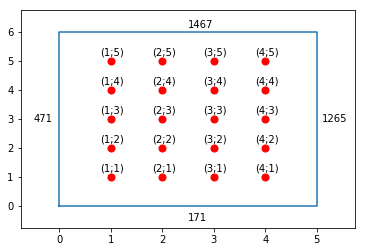

In [18]:
visualize.plate(BOUNDARY_CONDITIONS, amount_of_sections=amount_of_sections,
                options={"show_coord": True, "show_grid": False})

Для вирішення даної задачі, зводимо диференційне рівняння до різнецевого

$$\frac{\partial^2 T}{\partial x^2} = \frac {T(x - h_1, y) - 2 T(x, y) + T(x + h_1, y)} {h_1^2}$$

$$\frac{\partial^2 T}{\partial y^2} = \frac {T(x, y - h_2) - 2 T(x, y) + T(x, y + h_2)} {h_2^2}$$

Тобто, маємо рівняння виду

$$\frac {T(x - h_1, y) - 2 T(x, y) + T(x + h_1, y)} {h_1^2} +  \frac {T(x, y - h_2) - 2 T(x, y) + T(x, y + h_2)} {h_2^2} = 0$$

На основі якого, та значень краєвих умов, знаходимо значення функції у зазначених вузлах.

В даній реалізації використовується представлення другої похідної через __формулу центральних різниць__, яка являється __неявною різнецевою схемою__ та зазвичай вважається стійкою.

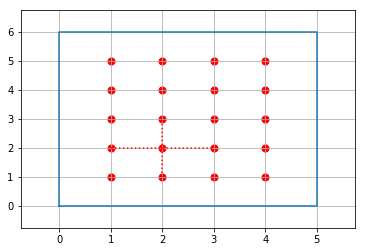

In [19]:
visualize.difference_scheme(amount_of_sections)

In [20]:
answer = boundary_problem.solve(method="grid", disp=True)

Input data
	Temperature on
		upper edge: 1467
		right edge: 1265
		lower edge: 171
		left edge: 471
Computational data
	Step size
		by X axis: 4.6
		by Y axis: 4.7
	Amount of equations: 38



_(результат округлений до двох знаків після коми)_

In [21]:
answer

array([[  965.02,  1155.73,  1246.24,  1289.29],
       [  753.59,   940.43,  1070.95,  1176.07],
       [  633.87,   779.08,   920.  ,  1078.36],
       [  531.06,   621.84,   752.36,   953.55],
       [  398.84,   426.52,   517.03,   723.11]])

Тобто, знайдений розподіл температур має вигляд.

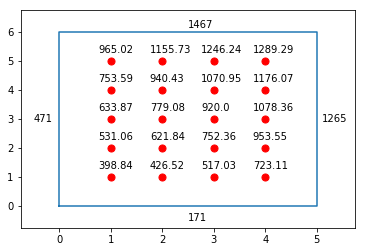

In [22]:
visualize.marked_plate(answer, amount_of_sections, BOUNDARY_CONDITIONS)

In [ ]:
df1 = pd.DataFrame(boundary_problem.get_a())
df2 = pd.DataFrame(boundary_problem.get_b())

writer = pd.ExcelWriter('output.xlsx')
df1.to_excel(writer,'Sheet1')
df2.to_excel(writer,'Sheet2')
writer.save()